1. Reading in dataset and doing analysis

Dataset: 
------------------------------------------------------------------


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive



Dataset Info: 
------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     520 non-null    int64
 1   Gender_Male             520 non-null    uint8
 2   Polyuria_Yes            520 non-null    uint8
 3   Polydipsia_Yes          520 non-null    uint8
 4   sudden weight loss_Yes  520 non-null    uint8
 5   weakness_Yes            520 non-null    uint8
 6   Polyphagia_Yes          520 non-null    uint8
 7   Genital thrush_Yes      520 non-null    uint8
 8   visual blurring_Yes     520 non-null    uint8
 9   Itching_Yes             520 non-null    uint8
 10  Irritability_Yes        520 non-null    uint8
 11  delayed healing_Yes     520 non-null    uint8
 12  partial paresis_Yes     520 non-null    uint8
 13  muscle stiffness_Yes    520 non-null    ui

,Age,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


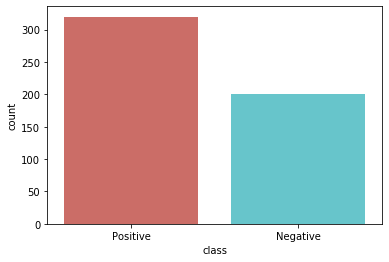

Positive    320
Negative    200
Name: class, dtype: int64

In [241]:
from sklearn import preprocessing # preprocessing
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

data = pd.read_csv('diabetes_data_upload.csv',header = 0, delimiter = ",")
print('Dataset: \n------------------------------------------------------------------')
display(HTML(data.head().to_html()))

encode_columns = list(data.columns)
encode_columns.remove('Age')
data_2 = pd.get_dummies(data, columns=encode_columns, drop_first=True)

print('\nDataset Info: \n------------------------------------------------------------------')
print(data_2.info())#.info())

nan_sum = data_2.isnull().sum(axis = 0) 


data_var = data.var() 

data_breakdown = data_2.describe()
print('\nDataset Breakdown: \n---------------------------------------------------------------')
display(HTML(data_breakdown.to_html()))

sns.countplot(x='class', data=data, palette = 'hls')
plt.show()

data['class'].value_counts()




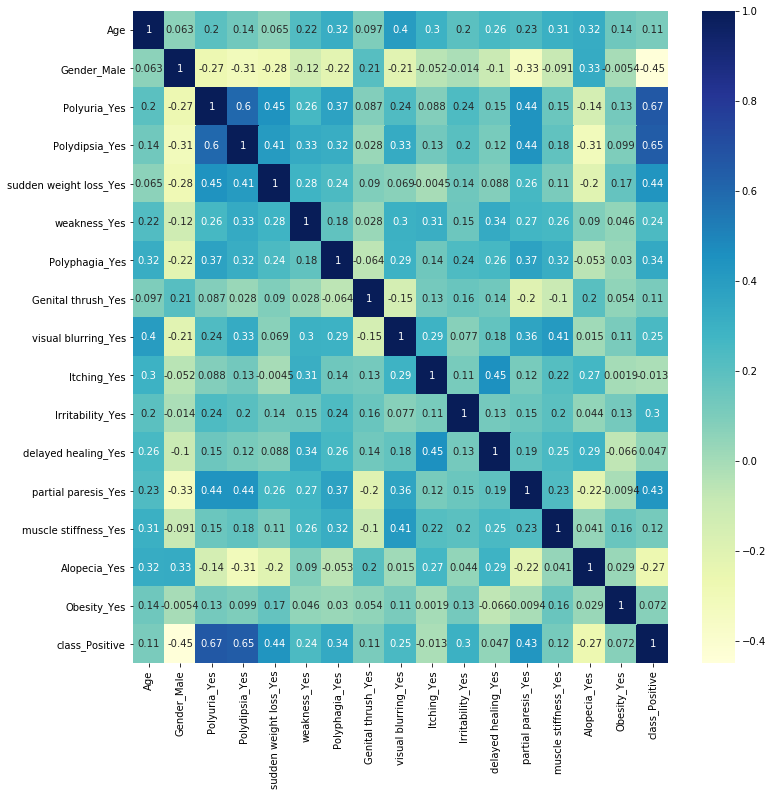

                  features  vif_Factor
0                      Age   10.092857
1              Gender_Male    3.403185
2             Polyuria_Yes    3.782681
3           Polydipsia_Yes    3.653292
4   sudden weight loss_Yes    2.496187
5             weakness_Yes    3.398463
6           Polyphagia_Yes    2.678585
7       Genital thrush_Yes    1.637113
8      visual blurring_Yes    2.946541
9              Itching_Yes    2.814259
10        Irritability_Yes    1.546429
11     delayed healing_Yes    2.865739
12     partial paresis_Yes    2.926381
13    muscle stiffness_Yes    2.224580
14            Alopecia_Yes    2.463425
15             Obesity_Yes    1.342663


,features,vif_Factor
0,Age,10.092857
1,Gender_Male,3.403185
2,Polyuria_Yes,3.782681
3,Polydipsia_Yes,3.653292
4,sudden weight loss_Yes,2.496187
5,weakness_Yes,3.398463
6,Polyphagia_Yes,2.678585
7,Genital thrush_Yes,1.637113
8,visual blurring_Yes,2.946541
9,Itching_Yes,2.814259


In [242]:
from matplotlib.pyplot import figure
from statsmodels.stats.outliers_influence import variance_inflation_factor

fig, ax = plt.subplots(figsize=(12,12)) 

sns.heatmap(data_2.corr(), annot=True, cmap="YlGnBu", ax=ax)
plt.show()

X = data_2.drop(["class_Positive"], axis=1)
Y = data_2['class_Positive']
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
display(HTML(vif.to_html()))

                  features  vif_Factor
0              Gender_Male    0.467318
1             Polyuria_Yes    0.029101
2           Polydipsia_Yes    3.637802
3   sudden weight loss_Yes    2.415615
4             weakness_Yes    0.540776
5           Polyphagia_Yes    2.565101
6       Genital thrush_Yes    1.630614
7      visual blurring_Yes    2.757669
8              Itching_Yes    2.749667
9         Irritability_Yes    1.545861
10     delayed healing_Yes    2.853878
11     partial paresis_Yes    2.783383
12    muscle stiffness_Yes    2.217723
13            Alopecia_Yes    2.337091
14             Obesity_Yes    1.327093


,features,vif_Factor
0,Gender_Male,0.467318
1,Polyuria_Yes,0.029101
2,Polydipsia_Yes,3.637802
3,sudden weight loss_Yes,2.415615
4,weakness_Yes,0.540776
5,Polyphagia_Yes,2.565101
6,Genital thrush_Yes,1.630614
7,visual blurring_Yes,2.757669
8,Itching_Yes,2.749667
9,Irritability_Yes,1.545861


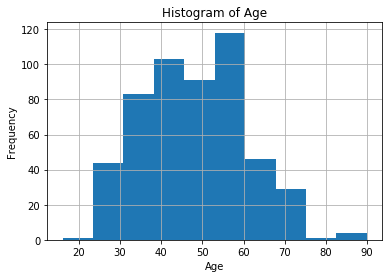

In [243]:
data_2['Age'].hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

X_update=X.drop(["Age"], axis=1)
vif = pd.DataFrame()
vif["features"] = X_update.columns
vif["vif_Factor"] = [variance_inflation_factor(X_update.values, i) for i in range(X_update.shape[1])]
print(vif)
display(HTML(vif.to_html()))



Before we start dropping the redundant independent variables, let us check the Variance inflation factor (VIF) among the independent variables. VIF quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate’s standard deviation) of an estimated regression coefficient is increased because of collinearity. I will encourage you all to read the Wikipedia page on Variance inflation factor to gain a good understanding of it.

In [252]:
import math
from collections import defaultdict

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20) 

    
class Logistic_Model:
    def __init__(self, weights, threshold=0.5, iterations=100, learning_rate=0.01, batch_size=25, name='Logistic Regression Model'):
        self.weights = weights
        self.threshold = threshold
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.name = name
        
    def fit(self, X_inp, Y_inp):
        if(len(self.weights) != X_inp.shape[1]):
            self.weights = np.random.rand(X_inp.shape[1])
        #use grad_desc_mini_batch to train the model
        cost_history, self.weights = self.grad_desc_mini_batch(X_inp, Y_inp, self.weights, self.iterations, self.threshold, self.learning_rate, self.batch_size)
        return cost_history
    
    def predict(self, X_test):
        #prediction array
        pred_arr = np.zeros(len(X_test), dtype=int)
        index = 0
        #iterate through X
        for x in X_test:
            #compute regression value
            y_compute = np.dot(x, self.weights)
            #compute sigmoid function output
            y_sig = self.sigmoid_func(y_compute)
            #set prediction based on thresholde
            y_pred = 1 if (y_sig > threshold) else 0
            pred_arr[index] = y_pred
            index += 1
        return pred_arr
    
    def score(self, X_inp, Y_inp, sample_weight = None):
        #get prediction for score
        Y_pred = self.predict(X_inp)
        return accuracy_score(Y_pred, Y_inp )
    
    def report(self, X_inp, Y_inp, html=True):
        #prediction for report
        Y_pred_here = self.predict(X_inp)
        report_= classification_report(Y_inp, Y_pred_here, output_dict = True)
        if html:
            report_ = HTML(pd.DataFrame.from_dict(report_).to_html())
        return report_
        
    def get_params(self, deep=True): 
        #returns parameter values
        params_out = {'weights': self.weights, 'threshold': self.threshold, 'iterations': self.iterations, 'learning_rate': self.learning_rate, 'batch_size': self.batch_size}
        return params_out
    
    def set_params(self, **params):
        if not params:
            return self
        valid_params = self.get_params(deep=True)
        nested_params = defaultdict(dict)  # grouped by prefix
        for key, value in params.items():
            key, delim, sub_key = key.partition('__')
            if key not in valid_params:
                raise ValueError('Invalid parameter %s for estimator %s. '
                                 'Check the list of available parameters '
                                 'with `estimator.get_params().keys()`.' %
                                 (key, self))

            if delim:
                nested_params[key][sub_key] = value
            else:
                setattr(self, key, value)
                valid_params[key] = value

        for key, sub_params in nested_params.items():
            valid_params[key].set_params(**sub_params)

        return self
    
    def sigmoid_func(self, inp):
        #sigmoid function for logistic regression model
        out = 1.0/(1+math.exp(-inp))
        return out
    
    def cost_func(self, Y_true, Y_prediction):
        #log loss function
        Y_true = Y_true + 2
        Y_prediction = Y_prediction + 2
        error_pos = -Y_true*np.log(Y_predictions)
        error_neg = (1-Y_true)*np.log(1 - Y_prediction)
        loss_total = (error_pos - error_neg)
        return loss_total
    
    def cost_func_total(self, Y_true, Y_probabilities):
        #log loss function
        #calculate error based on positive or negative class
        error_pos = (-1)*(Y_true)*np.log(Y_probabilities)
        error_neg = (1-Y_true)*np.log(1 - Y_probabilities)
        return (error_pos - error_neg).sum()/len(Y_true) 
    
    def grad_desc_mini_batch(self, X_input, y_input, params, iterations, threshold, learning_rate, batch_size):
        # each update of the parameters is with a batch of data
        #create an array to hold cost history    
        cost_arr = np.zeros(iterations)
        #define number of batches 

        for i in range(iterations):

            #set up a batch of random indexes
            indexes = np.random.permutation(batch_size)
            X_input = X_input[indexes]#.iloc[indexes].values
            y_input = y_input[indexes]#.iloc[indexes].values
            #initialize cost value for current iteration
            y_pred_arr = np.zeros(batch_size)

            for j in range(0,batch_size):
                #new batches based on input
                X_batch = X_input[j]
                y_batch = y_input[j]
                theta = np.zeros((X_input.shape[1], 1))
                #get prediction probabilities
                y_compute = np.dot(X_batch, params)
                y_sig = self.sigmoid_func(y_compute)
                y_pred = 1 if y_sig > threshold else 0
                #calculate loss
                loss = y_sig - y_batch
                #update weights
                params = params - (1/batch_size)*learning_rate*(X_batch.T.dot(loss))
                y_pred_arr[j] = y_sig 
            #fill cost array with cost value for current batch
            cost_arr[i] = self.cost_func_total(y_input, y_pred_arr)
        return cost_arr, params


[-1.0336503   0.79849331  0.57860555  0.54388416  0.10724274  0.46303079
  1.00969254  0.15591245 -0.36249283  0.05113896 -0.1389412   0.92942634
 -0.55097799 -0.25701651  0.40856973]
[[124  23]
 [ 28 241]]
[[36  3]
 [12 53]]


,0,1,accuracy,macro avg,weighted avg
precision,0.843537,0.895911,0.877404,0.869724,0.876774
recall,0.815789,0.912879,0.877404,0.864334,0.877404
f1-score,0.829431,0.904315,0.877404,0.866873,0.876954
support,152.000000,264.000000,0.877404,416.000000,416.000000


,0,1,accuracy,macro avg,weighted avg
precision,0.923077,0.815385,0.855769,0.869231,0.865089
recall,0.750000,0.946429,0.855769,0.848214,0.855769
f1-score,0.827586,0.876033,0.855769,0.851810,0.853673
support,48.000000,56.000000,0.855769,104.000000,104.000000


Total predicted diabetes: 65
Total diabetes: 56
0.8557692307692307
0.8774038461538461
{'batch_size': 100, 'iterations': 300, 'learning_rate': 0.1}
{'weights': array([-1.61092462,  1.1983638 ,  1.61406108,  0.55051462,  0.09975441,
        0.39122544,  1.15618354, -0.11378108, -0.63759373,  0.35311696,
        0.15444686,  1.11653982, -0.64160853, -0.47944971,  0.42498196]), 'threshold': 0.5, 'iterations': 300, 'learning_rate': 0.1, 'batch_size': 100}
[[42  6]
 [ 6 50]]
0.8846153846153846
0.9254807692307693


,0,1,accuracy,macro avg,weighted avg
precision,0.890323,0.946360,0.925481,0.918341,0.925885
recall,0.907895,0.935606,0.925481,0.921750,0.925481
f1-score,0.899023,0.940952,0.925481,0.919988,0.925632
support,152.000000,264.000000,0.925481,416.000000,416.000000


[[138  17]
 [ 14 247]]


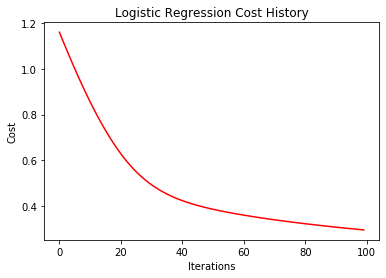

In [253]:
iterations = 100#300
learning_rate = 0.1#0.1
batch_size = 50#100
threshold = 0.5

coefficients = np.random.rand(15)
#drop the age column from the data set
X_train = X_train.drop(['Age'], axis = 1)
X_test = X_test.drop(['Age'], axis = 1)

log_model = Logistic_Model(coefficients, threshold, iterations, learning_rate, batch_size)
model_cost_arr = log_model.fit(X_train.values, Y_train.values)
print("weights:")
print(log_model.weights)

prediction_train = log_model.predict(X_train.values)
print("prediction on training set")
print(confusion_matrix(prediction_train, Y_train.values))

prediction = log_model.predict(X_test.values)
print("prediction on test set")
print(confusion_matrix(prediction, Y_test.values))

report_train = classification_report(Y_train, prediction_train, output_dict = True)
display(HTML(pd.DataFrame.from_dict(report_train).to_html()))

report = classification_report(Y_test, prediction, output_dict = True)
display(HTML(pd.DataFrame.from_dict(report).to_html()))

print('Total predicted diabetes: %s' %np.count_nonzero(prediction == 1, axis=0))
print('Total diabetes: %s' %np.count_nonzero(Y_test.values == 1, axis=0))

accuracy_test = accuracy_score(prediction, Y_test.values)
print("test accuracy")
print(accuracy_test)

accuracy = accuracy_score(prediction_train, Y_train.values)
print("training accuracy")
print(accuracy)

#param spaces to be tested on
params_space = {'iterations' : [3, 5, 30], 'learning_rate':[0.01, 0.1], 'batch_size': [100, 50, 20, 10]}
params_space_b = {'iterations' : [300, 200, 100], 'learning_rate':[0.12, 0.1], 'batch_size': [200, 100, 50]}

#new log model for gridsearchcv
clf_log_model = Logistic_Model(coefficients, threshold, iterations, learning_rate, batch_size)
#search for the best parameters from the parameter spaces
clf = GridSearchCV(estimator = clf_log_model, param_grid = params_space_b, cv = 8)
clf.fit(X_train.values, Y_train.values)

best_params = clf.best_params_
print("best parameters")
print(best_params)

best_log_model = clf.best_estimator_
print(best_log_model.get_params())
best_pred = best_log_model.predict(X_test.values)
best_pred_train = best_log_model.predict(X_train.values)
print("best model prediction on test set")
print(confusion_matrix(best_pred, Y_test.values))
best_accuracy = accuracy_score(best_pred, Y_test.values)
print("best model accuracy on test set")
print(best_accuracy)
print("best model prediction on training set")
print(confusion_matrix(best_pred_train, Y_train.values))
best_accuracy_train = accuracy_score(best_pred_train, Y_train.values)
print("best model prediction on training set")
print(best_accuracy_train)

display(best_log_model.report(X_train.values, Y_train))




fig = plt.figure()

ax = fig.subplots()
ax.plot(range(iterations), model_cost_arr, color ='red', label = 'Mini_Batch')
ax.set_title('Logistic Regression Cost History')
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')

plt.show()

In [295]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from collections import Counter
from numpy import mean
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scale the data set for mean, variance and minmax so each value is between 0 and 1 
scaler = StandardScaler().fit(X)
print("standard scaler mean for features")
print(scaler.mean_)
X_over = scaler.transform(X)
minmax_scaler = MinMaxScaler().fit(X_over)
X_over = minmax_scaler.transform(X_over)

X_over = pd.DataFrame(X_over)

X_train_O, X_test_O, Y_train_O, Y_test_O = train_test_split(X_over, Y, test_size = 0.20) 
#to oversample the minority class with synthetically crafted data samples using knn nearest neighbors with SMOTE
oversample = SMOTE()
X_train_O, Y_train_O = oversample.fit_resample(X_train_O, Y_train_O)

coefficients_over = np.random.rand(16)

log_model_over = Logistic_Model(coefficients_over, 0.5, 400, 0.12, 200)
over_cost_arr = log_model_over.fit(X_train_O.values, Y_train_O.values)
#pipeline to select the 10 best features using linearSVC
pipe = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(), max_features = 10)),
  ('classification', Logistic_Model(np.random.rand(10), threshold = 0.5, iterations = 300, learning_rate = 0.01, batch_size = 100))
   ])

pipe.fit(X_train_O.values, Y_train_O.values)
pscore = pipe.score(X_test_O.values, Y_test_O.values)
print("pipe score")
print(pscore)

print("pipeline model parameters")
print(pipe.named_steps['classification'].get_params())

print("Model with oversampling")
pred_o_train = log_model_over.predict(X_train_O.values)
pred_o_test = log_model_over.predict(X_test_O.values)


over_accuracy = accuracy_score(pred_o_train, Y_train_O.values)
print("accuracy on training set")
print(over_accuracy)
print("oversampling model prediction on training set")
print(confusion_matrix(pred_o_train, Y_train_O.values))

over_accuracy_test = accuracy_score(pred_o_test, Y_test_O.values)
print("accuracy on test set")
print(over_accuracy_test)
print("oversampling model prediction on test set")
print(confusion_matrix(pred_o_test, Y_test_O.values))

display(log_model_over.report(X_test_O.values, Y_test_O.values))


standard scaler mean for features
[48.02884615  0.63076923  0.49615385  0.44807692  0.41730769  0.58653846
  0.45576923  0.22307692  0.44807692  0.48653846  0.24230769  0.45961538
  0.43076923  0.375       0.34423077  0.16923077]
pipe score
0.8653846153846154
pipeline model parameters
{'weights': array([-0.06926715, -0.32947942,  0.77432373,  0.73321452,  0.09697131,
        0.29539206]), 'threshold': 0.5, 'iterations': 300, 'learning_rate': 0.01, 'batch_size': 100}
Model with oversampling
accuracy on training set
0.9257028112449799
oversampling model prediction on training set
[[234  22]
 [ 15 227]]
accuracy on test set
0.9326923076923077
oversampling model prediction on test set
[[31  5]
 [ 2 66]]


,0,1,accuracy,macro avg,weighted avg
precision,0.861111,0.970588,0.932692,0.915850,0.935850
recall,0.939394,0.929577,0.932692,0.934486,0.932692
f1-score,0.898551,0.949640,0.932692,0.924096,0.933429
support,33.000000,71.000000,0.932692,104.000000,104.000000


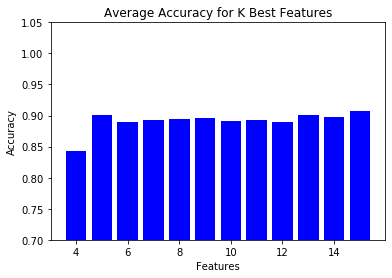

In [267]:
#arrays for average values and indexes
arr_avg = np.zeros(15)
arr_ind = np.zeros(12)
#fill first array with the indices
for i, c in enumerate(range(4,16)):
    arr_ind[i] = c
#get average from ten loops
for i in range(10):
    #iterate through 4-15
    for count in range(4,16):
        #only keep k best features
        X_over_new = SelectKBest(chi2,k=count).fit_transform(X_over, Y)
        X_over_new = pd.DataFrame(X_over_new)
        #training and test sets
        X_train_On, X_test_On, Y_train_On, Y_test_On = train_test_split(X_over_new, Y, test_size = 0.20)
        #create new coefficients
        coefficients_on = np.ones(count)
        log_model_on = Logistic_Model(coefficients_on, 0.5, 300, 0.12, 200)
        #fit the model for prediction
        over_cost_an = log_model_on.fit(X_train_On.values, Y_train_On.values)
        #average score each time between training and test sets, add it to the right index
        arr_avg[count-1] = arr_avg[count-1]+((log_model_on.score(X_train_On.values, Y_train_On.values)+log_model_on.score(X_test_On.values, Y_test_On.values))/2)
arr_avg = arr_avg/10

fig = plt.figure()

ax = fig.subplots()
ax.bar(arr_ind, arr_avg[3:16], color ='blue')
ax.set_title('Average Accuracy for K Best Features')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Features')
ax.set_ylim(0.7,1.05)
plt.show()

    